In [ ]:
# Building a Neural Network

In [44]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(10))

x = iris.data
#reshape for OneHotEncoder
y = iris.target.reshape(-1,1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# --- ADDED THIS LINE ---
# Split the scaled features (x_scaled) and encoded targets (y_encoded)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)
# -----------------------

# Construct the Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'), # Hidden Layer
    Dense(3, activation = 'softmax') #Output Layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.1)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


C:\Users\Thasmika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2087 - loss: 1.5892 - val_accuracy: 0.1667 - val_loss: 1.3144
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2285 - loss: 1.4160 - val_accuracy: 0.0833 - val_loss: 1.2408
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1552 - loss: 1.2880 - val_accuracy: 0.2500 - val_loss: 1.1762
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2840 - loss: 1.2626 - val_accuracy: 0.2500 - val_loss: 1.1199
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3343 - loss: 1.1551 - val_accuracy: 0.2500 - val_loss: 1.0706
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3168 - loss: 1.1612 - val_accuracy: 0.2500 - val_loss: 1.0265
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4521 - loss: 1.0396 - val_accuracy: 0.2500 - val_loss: 0.9902
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5077 - loss: 0.9523 - val_accuracy: 0.2500 - v

In [ ]:
# Evaluate the Model

In [46]:
test_loss , test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.1151
Test Accuracy: 1.00


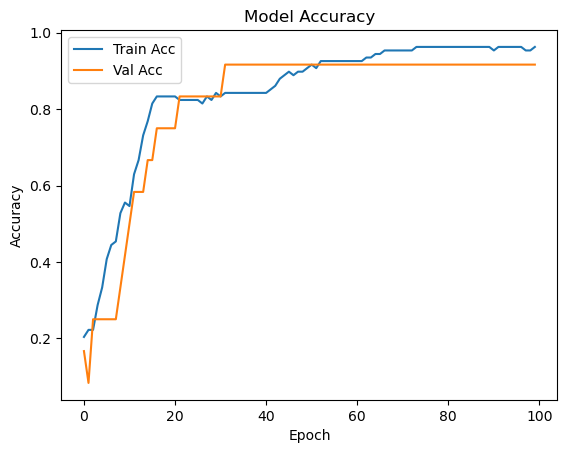

In [48]:
import matplotlib.pyplot as plt

# plot model accuracy
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


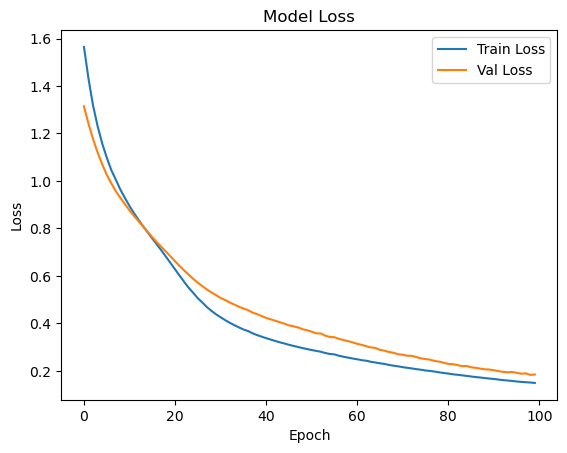

In [50]:
# plot model loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()